In [126]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# the integrated values survey was created using the provided merge syntax and IBM SPSS
df, meta = pyreadstat.read_sav("Integrated_values_surveys_1981-2021.sav", encoding="cp850")

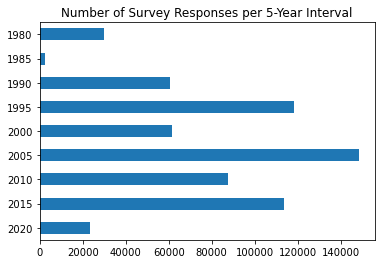

In [74]:
(df["S020"].astype(int)//5 * 5).value_counts().sort_index(ascending=False).plot.barh()
plt.title("Number of Survey Responses per 5-Year Interval")
plt.savefig("plots/number_of_responses_per_five_years.png")
# pd.to_datetime(df["S012"], format="%Y%M%d")

In [81]:
# since the 1985 inteval has so few responses, it is combined with the 1980 one.
df["year"] = (df["S020"].astype(int)//5 * 5)
df["year"][df["year"] == 1985] = 1980

<ipython-input-81-9b769c8925a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"][df["year"] == 1985] = 1980


1980    2338.0
1985       NaN
1990       0.0
1995       0.0
2000       0.0
2005       0.0
2010       0.0
2015       0.0
2020       0.0
dtype: float64

In [116]:
iso_codes = pd.read_csv("iso country codes/iso3166.tsv", sep="\t")
iso_codes["Numeric"] = iso_codes["Numeric"].fillna(0).astype(int)
alpha2_to_alpha3 = iso_codes.set_index("Alpha-2 code")["Alpha-3 code"].to_dict()

def map_codes(alpha2val):
    if alpha2val in alpha2_to_alpha3:
        return alpha2_to_alpha3[alpha2val]
    else:
        return "invalid"

df["country"] = df["S009"].apply(map_codes)

In [153]:
responses_per_country_per_interval = df["country"].groupby(df["year"]).apply(lambda x: x.value_counts().sort_values()).unstack(level=0).fillna(0).astype(int)

share_of_invalid_responses = responses_per_country_per_interval.loc["invalid"] / responses_per_country_per_interval.iloc[:-1].sum()
print(share_of_invalid_responses)

print(responses_per_country_per_interval.loc[["AUT", "DEU", "SWE", "FRA", "RUS", "TUR", "CHN", "IND", "JPN", "IRN", "USA", "BRA", "CAN", "MEX"]])

# the share of responses from unrecognized (as per ISO-3166) countries per time-interval is fairly small.
# Looking at a small sample size of potentially interesting countries, none are present in all time-intervals.
# This indicates potential issues with continuity in the data.

year
1980    0.048422
1990    0.030489
1995    0.037696
2000    0.019819
2005    0.036360
2010    0.000000
2015    0.015988
2020    0.000000
dtype: float64
year  1980  1990  1995  2000  2005  2010  2015  2020
AUT      0  1460  1522     0  1510     0  1644     0
DEU   1305  3437  4062     0  4139  2046  3698     0
SWE    954  1047  2024     0  2190  1206  1194     0
FRA   1200  1002  1615     0  2502     0  1870     0
RUS      0  1961  4540     0  3537  2500  3635     0
TUR      0  1030  1907  4607  3730  1605  2415     0
CHN      0  1000  1500  1000  1991  2300  3036     0
IND      0  2500  2040  2002  2001  4078     0     0
JPN   1204  1011  1054  1362  1096  2443  1353     0
IRN      0     0     0  2532  2667     0     0  1499
USA   2325  1839  2742     0  1249  2232  2596     0
BRA      0  1782  1143     0  1500  1486  1762     0
CAN   1254  1730     0  1931  2164     0     0  4018
MEX   1837  1531  1510  1535  1560  2000  1739     0


In [164]:
interesting_questions = ["A001", # family
                         "A002", # friends
                         "A003", # leisure time
                         "A004", # politics
                         "A005", # work
                         "A006", # religion
                         "A010", # happiness
                         "A165", # most people can be trusted
                         "B008", # protecting environment vs econ growth
                         "D059", "D060", # sexism
                         "E069_04", # confidence in press
                         "E069_11", # confidence in government
                         "E069_14", # confidence in environmental protection movement
                         "E235", # importance of democracy
                         "F034", # religious person (maybe redundant with A006)
                         "G006", # proud of nationality
                         ]
# share of non-responses
by_interval = df[interesting_questions].applymap(lambda x: x if x > 0 else np.nan).isna().groupby(df["year"])
non_responses = (by_interval.sum() / by_interval.count().max()).T
non_responses
# most questions have fairly high rates of non-responses in the 1980 interval.
# notable exceptions are A165 (general trust) and F034 (religious person).
# other questions undergo large fluctuations
# Overall, A001-A006, A165, E069_04, F034 and G006 seem like the most reliable values

year,1980,1990,1995,2000,2005,2010,2015,2020
A001,0.200329,0.003055,0.010337,0.009164,0.024444,0.002212,0.001854,0.000418
A002,0.200356,0.003608,0.013270,0.011463,0.026797,0.003554,0.002677,0.000634
A003,0.200525,0.006844,0.019130,0.014700,0.032596,0.006891,0.004599,0.000856
A004,0.200821,0.009076,0.021955,0.019676,0.039319,0.010802,0.008827,0.001591
A005,0.200713,0.005287,0.016999,0.013142,0.035691,0.010169,0.008260,0.001173
A006,0.202777,0.008793,0.023115,0.013291,0.036709,0.008948,0.008065,0.001773
A010,0.137342,0.195198,0.796886,0.416369,1.000000,0.590482,0.766165,0.157605
A165,0.017188,0.021571,0.031261,0.015664,0.058988,0.015907,0.013628,0.001740
B008,0.215932,0.407502,0.351872,0.074760,0.509484,0.043715,0.048044,0.007242
D059,0.215932,0.407502,0.322924,0.052980,0.473132,0.027633,0.024929,0.003790
